<a href="https://colab.research.google.com/github/smalvar/CalculadoraAluguel-Novembro/blob/main/2.%20Limpeza%20de%20dados%20e%20EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [10]:
dados = pd.read_csv('https://raw.githubusercontent.com/smalvar/CalculadoraAluguel-Novembro/main/banco_final.csv')

In [11]:
dados = dados.drop(['Unnamed: 0'],axis=1)
dados.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua,zona
0,3400,2.0,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2.0,1.0,130,Jardim Paulista,"Rua Caconde, 310",Oeste
1,3400,2.0,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2.0,2.0,88,Sumarezinho,"Rua Oscar Caravelas, 280",Oeste
2,5400,2.0,"Rua Peixoto Gomide, 596 - Jardim Paulista, São...",2.0,1.0,72,Jardim Paulista,"Rua Peixoto Gomide, 596",Oeste
3,2600,2.0,"Rua Pamplona - Jardim Paulista, São Paulo - SP",2.0,1.0,91,Jardim Paulista,Rua Pamplona,Oeste
4,3800,1.0,"Pinheiros, São Paulo - SP",1.0,1.0,44,SP,"Pinheiros, São Paulo",Oeste


In [36]:
dados[(dados.zona=='Oeste')&(dados.quartos<=2.0)&(dados.area==72)]

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua,zona
2,5400,2.0,"Rua Peixoto Gomide, 596 - Jardim Paulista, São...",2.0,1.0,72,Jardim Paulista,"Rua Peixoto Gomide, 596",Oeste
27,4990,2.0,"Rua Capote Valente, 467 - Pinheiros, São Paulo...",2.0,1.0,72,Pinheiros,"Rua Capote Valente, 467",Oeste
70,1500,2.0,"Rua Coronel Camisão, 409 - Vila Gomes, São Pau...",2.0,1.0,72,Vila Gomes,"Rua Coronel Camisão, 409",Oeste


In [37]:
dados[(dados.zona=='Oeste')&(dados.quartos<=3.0)&(dados.area==72)]['aluguel'].mean()

3322.5

> Esse é um estimador! O KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

NameError: name 'X' is not defined

In [41]:
X = dados[['zona', 'area', 'quartos','banheiro','vaga']]
y = dados['aluguel']

In [40]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

ValueError: could not convert string to float: 'Oeste'

In [42]:
X = pd.get_dummies(X)

In [43]:
X.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,130,2.0,2.0,1.0,0,0,0,1,0
1,88,2.0,2.0,2.0,0,0,0,1,0
2,72,2.0,2.0,1.0,0,0,0,1,0
3,91,2.0,2.0,1.0,0,0,0,1,0
4,44,1.0,1.0,1.0,0,0,0,1,0


In [50]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [51]:
neigh.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]]) #dados[['zona', 'area', 'quartos','banheiro','vaga']]

array([3963.33333333])

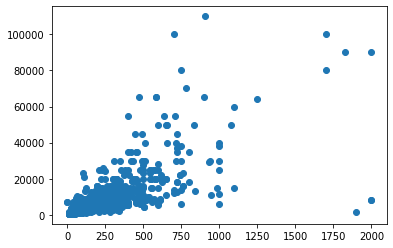

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(dados['area'],dados['aluguel'])

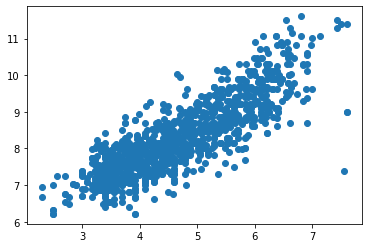

In [59]:
plt.scatter(np.log(dados['area']),np.log(dados['aluguel']))

In [61]:
dados_reduzidos = dados[['area', 'aluguel']]
dados_reduzidos.head()

,area,aluguel
0,130,3400
1,88,3400
2,72,5400
3,91,2600
4,44,3800


In [76]:
X = dados_reduzidos['area']
y = dados_reduzidos['aluguel']

In [81]:
X.values.shape

(1098,)

In [82]:
X.values

array([130,  88,  72, ..., 275, 130, 108])

In [78]:
X.values.reshape(-1, 1)

array([[130],
       [ 88],
       [ 72],
       ...,
       [275],
       [130],
       [108]])

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
reg.coef_

array([34.56716466])

In [67]:
reg.intercept_

783.8966408917568

$$aluguel = w_1 * area + C$$

In [83]:
X = dados[['zona', 'area', 'quartos','banheiro','vaga']]
y = dados['aluguel']
X = pd.get_dummies(X)
X = X.dropna()
y=y[X.index]

In [84]:
X.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,130,2.0,2.0,1.0,0,0,0,1,0
1,88,2.0,2.0,2.0,0,0,0,1,0
2,72,2.0,2.0,1.0,0,0,0,1,0
3,91,2.0,2.0,1.0,0,0,0,1,0
4,44,1.0,1.0,1.0,0,0,0,1,0


In [71]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
reg.coef_

array([   25.8795294 ,  -243.97330043,  1297.497614  ,   333.59687688,
         928.93829529, -1539.91785816,  -849.36112437,  1089.13207074,
         371.2086165 ])

$$aluguel = w_1 * area + w_2 *	quartos+ w_3 *banheiro + w_4*vaga + w_5*	zonacentro+ w_6 *	zonaleste + w_7 *	zonanorte + w_7 *	zonaoeste + w_8*zonasul +  b$$


In [73]:
reg.intercept_

-1453.0427412557356

In [74]:
reg.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]])

array([3940.06095025])

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

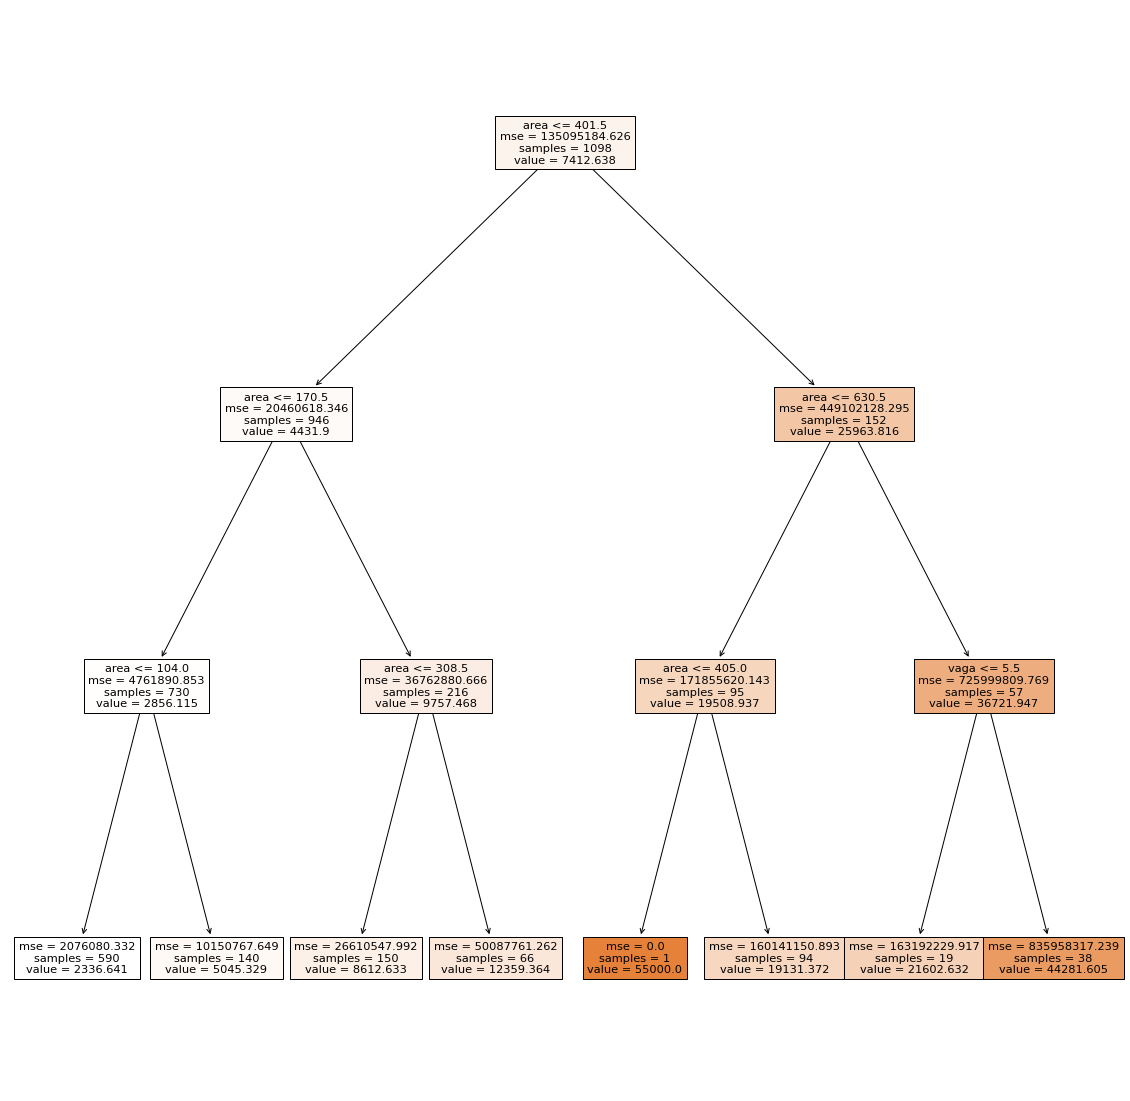

In [91]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, feature_names=X.columns);

In [106]:
area_maximo = 200
area_filtro = dados['area']<=area_maximo

In [107]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X[area_filtro], y[area_filtro])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

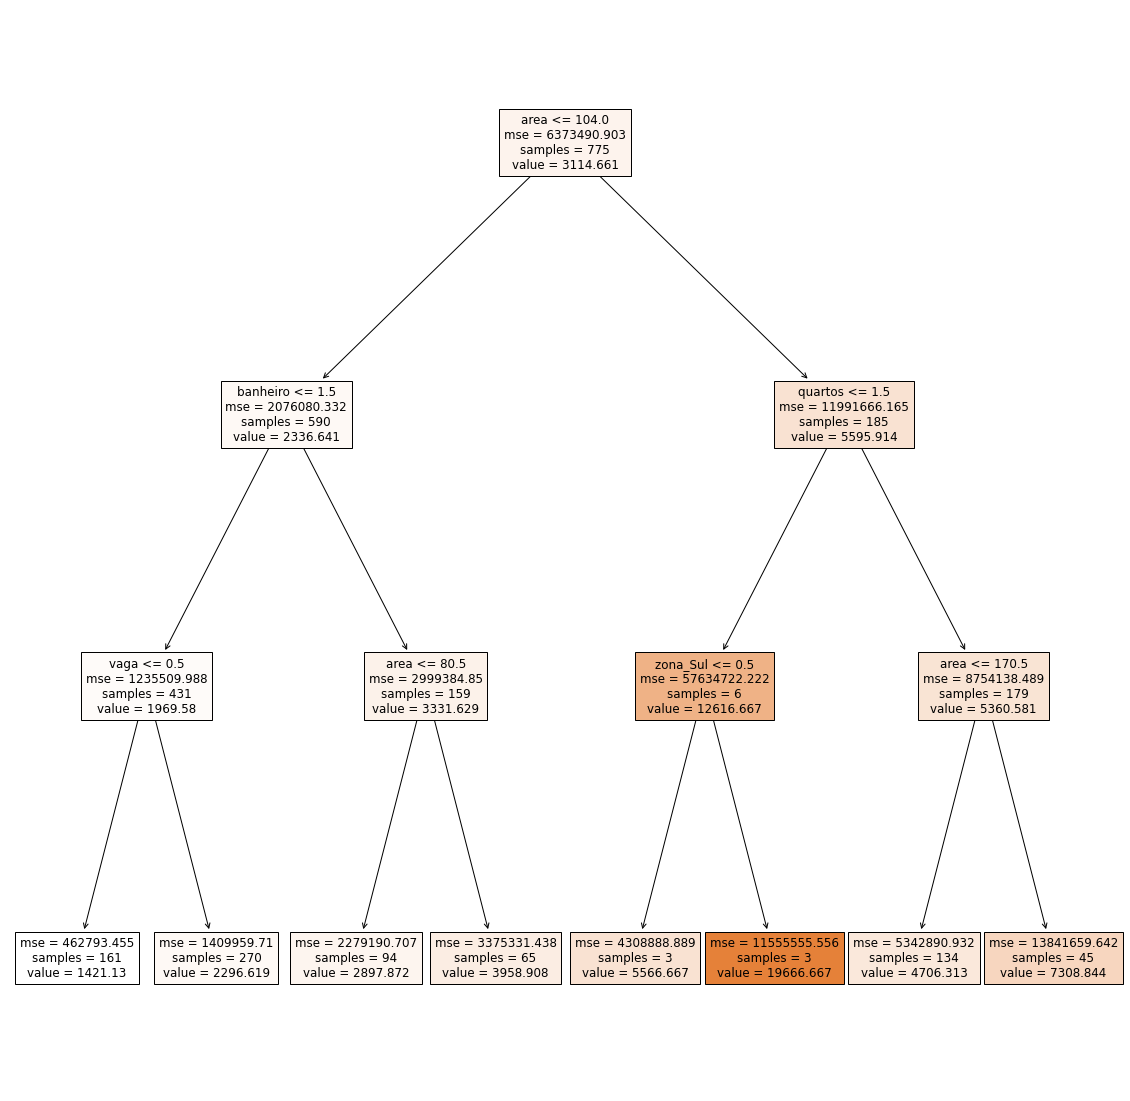

In [108]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, feature_names=X.columns);

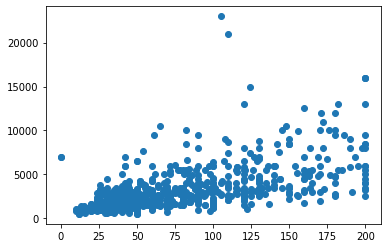

In [109]:
plt.scatter(dados[area_filtro]['area'],dados[area_filtro]['aluguel'])

In [113]:
len(dados[area_filtro]['area'])

775

In [114]:
dt.predict([[72, 2, 2, 1, 0, 0, 0, 1, 0]])

array([2897.87234043])